# 2 基于mapclassify的地图拓扑着色

In [1]:
import geopandas as gpd
import mapclassify as mc
import matplotlib.pyplot as plt

In [2]:
# 定义CRS
albers_proj = '+proj=aea +lat_1=25 +lat_2=47 +lon_0=105'

china_counties = gpd.read_file('县.shp').to_crs(albers_proj)

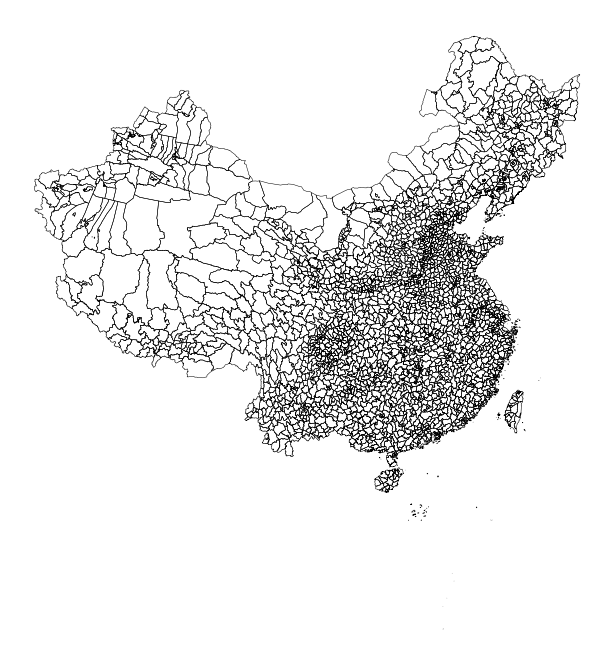

In [3]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(12, 12))
china_counties.plot(facecolor='none', linewidth=0.5, ax=ax)
ax.axis('off');

In [4]:
# 基于中国县级单元矢量要素生成拓扑着色标签
china_counties['colors'] = mc.greedy(china_counties, 
                                     min_colors=4, # 设置至少分配4种色彩
                                     min_distance=100) # 设置以100为矢量间拓扑邻近关系判定阈值

In [5]:
china_counties['colors'].unique()

array([1, 6, 4, 5, 2, 3, 0], dtype=int64)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
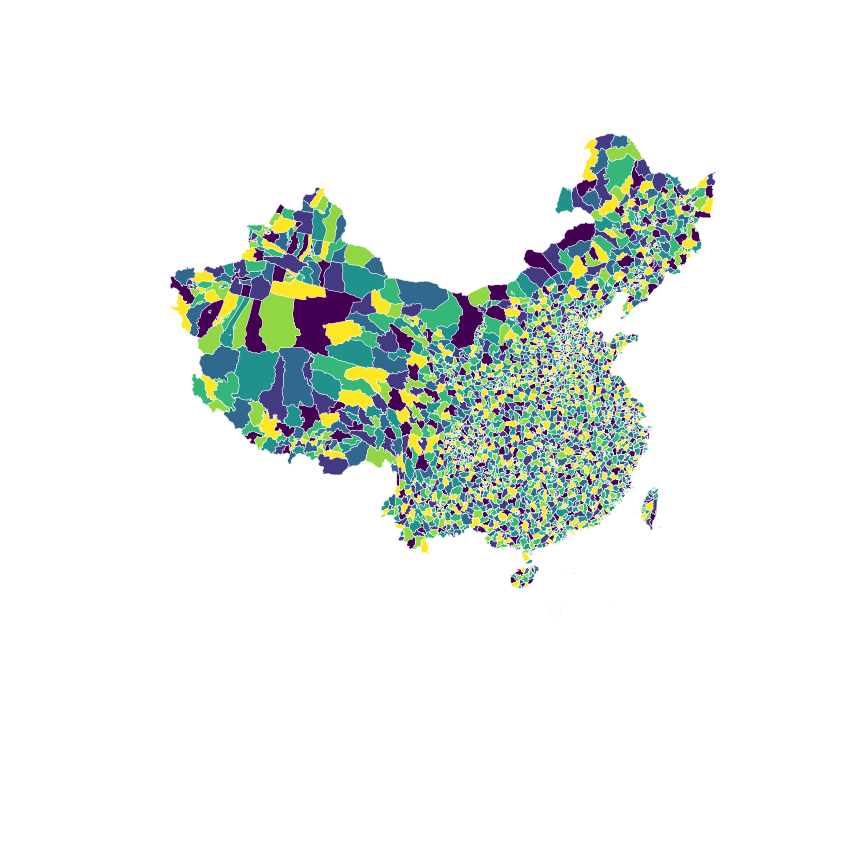

In [6]:
%matplotlib widget

fig, ax = plt.subplots(figsize=(12, 12))
# 基于colors字段进行色彩映射
china_counties.plot(column='colors', linewidth=0.4, edgecolor='white', ax=ax)
ax.axis('off');

In [7]:
china_counties['colors'].nunique()

7

In [8]:
from palettable.cmocean.sequential import Deep_7

In [9]:
Deep_7.hex_colors

['#FDFECC', '#A5DFA7', '#5DBAA4', '#488E9E', '#3E6495', '#403A6E', '#281A2C']

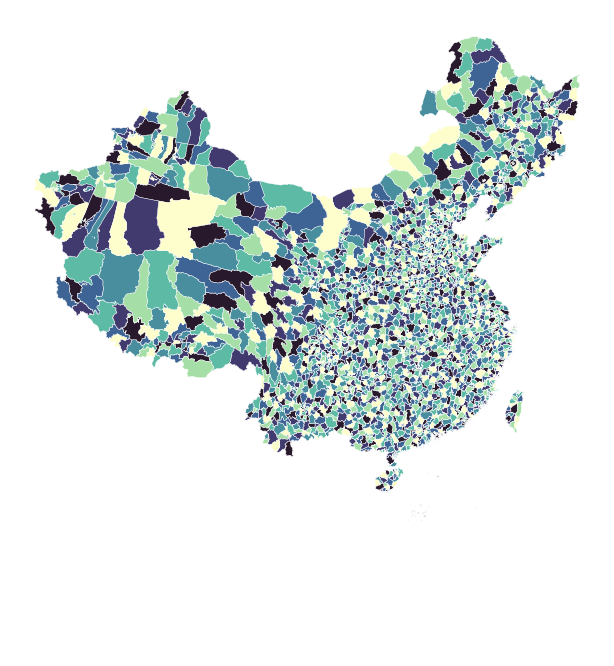

In [10]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(12, 12))
# 基于colors字段进行色彩映射
china_counties.plot(color=china_counties['colors'].map(lambda i: Deep_7.hex_colors[i]),
                    linewidth=0.4, 
                    edgecolor='white',
                    ax=ax)
ax.axis('off');